# Airbnb Analysis

# TEAM 11:
## Salma Ahmed Sengab
## Menna Elsayed
## Habiba Mohamed Amin
## Salma Mohamed Elqersh
## Hesham Mansour

 # Importing all import python libraries

In [751]:
import pandas as pd
import numpy as np
import glob
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing

In [752]:
result=pd.read_csv("train_users_2.csv")
result.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [753]:
len(result)

213451

In [754]:
result

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


# Taking a look to data named "result"

In [755]:
result.shape

(213451, 16)

#### we have 213451 row and 16 column in our DataFrame

In [756]:
result.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [757]:
result.tail()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF
213450,nw9fwlyb5f,2014-06-30,20140630235824,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF


In [758]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [759]:
result.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [760]:
result.nunique()

id                         213451
date_account_created         1634
timestamp_first_active     213451
date_first_booking           1976
gender                          4
age                           127
signup_method                   3
signup_flow                    17
language                       25
affiliate_channel               8
affiliate_provider             18
first_affiliate_tracked         7
signup_app                      4
first_device_type               9
first_browser                  52
country_destination            12
dtype: int64

### First, we will Convert columns to appropriate datatypes.

In [761]:
#convert "date_account_created", "date_first_booking" and "timestamp_first_active" columns into date type.
result['date_first_booking'] = pd.to_datetime(result['date_first_booking'])
result['date_account_created'] = pd.to_datetime(result['date_account_created'])
result['timestamp_first_active'] = pd.to_datetime(result['timestamp_first_active'])

In [762]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   213451 non-null  object        
 5   age                      125461 non-null  float64       
 6   signup_method            213451 non-null  object        
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  object        
 9   affiliate_channel        213451 non-null  object        
 10  affiliate_provider       213451 non-null  object        
 11  first_affiliate_tracked  207386 non-null  object        
 12  signup_app      

In [763]:
result.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.319043255,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.523174809,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,1970-01-01 05:34:51.208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


# Second: preprocessing:

### check for douplicates 

In [764]:
result.duplicated().sum()

0

# check for Nulls:

In [765]:
result.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [766]:
# nulls in percentage
null_percentage=result.isna().mean().round(2)
null_percentage

id                         0.00
date_account_created       0.00
timestamp_first_active     0.00
date_first_booking         0.58
gender                     0.00
age                        0.41
signup_method              0.00
signup_flow                0.00
language                   0.00
affiliate_channel          0.00
affiliate_provider         0.00
first_affiliate_tracked    0.03
signup_app                 0.00
first_device_type          0.00
first_browser              0.00
country_destination        0.00
dtype: float64

<AxesSubplot:ylabel='count'>

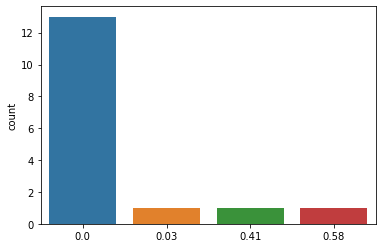

In [767]:
sns.countplot(x = null_percentage)

<AxesSubplot:>

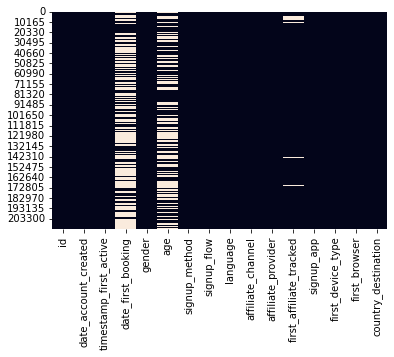

In [768]:
sns.heatmap(result.isnull(), cbar=False)

In [769]:
result.isin({"?"}).sum()

id                         0
date_account_created       0
timestamp_first_active     0
date_first_booking         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

In [770]:
result.isin({"NA"}).sum()

id                         0
date_account_created       0
timestamp_first_active     0
date_first_booking         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

In [771]:
result.isin({"-unknown-"}).sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking             0
gender                     95688
age                            0
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked        0
signup_app                     0
first_device_type              0
first_browser              27266
country_destination            0
dtype: int64

In [772]:
result.replace('-unknown-',np.NaN,inplace=True)
# here, we replaced 'unknown' value with nan to be easy to handle it.

<AxesSubplot:>

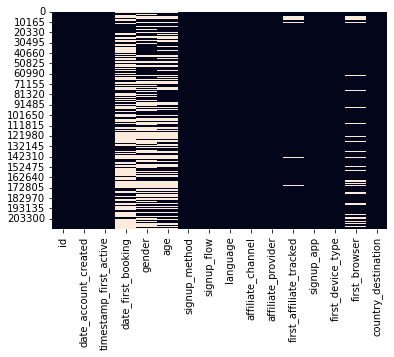

In [773]:
sns.heatmap(result.isnull(), cbar=False)

### now, the "date_first_booking", "age" , "first_affiliate_tracked"  
### , "first_browser" and "gender" columns have null values
### so, we will handle them:

## ________________________

In [774]:
# Here, we dropped the null values in "first_affiliate_tracked" column.
result.dropna(subset=['first_affiliate_tracked'],inplace=True)

In [775]:
result['first_affiliate_tracked'].isnull().sum()

0

<AxesSubplot:>

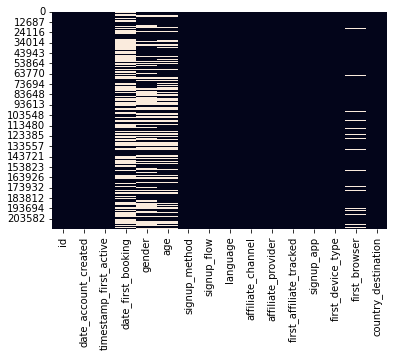

In [776]:
sns.heatmap(result.isnull(), cbar=False)

#### Nulls have been removed from ' first_affiliate_tracked' 

## ____________________

## date_first_booking:

In [777]:
# Here, we filled the nulls with before and after values in column
result['date_first_booking'] = result['date_first_booking'].bfill()
result['date_first_booking'] = result['date_first_booking'].ffill()

In [778]:
result.shape

(207386, 16)

<AxesSubplot:>

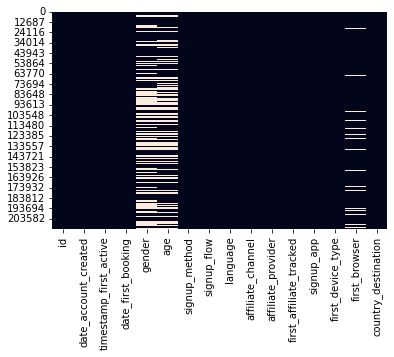

In [779]:
sns.heatmap(result.isnull(), cbar=False)

## First browser:

In [780]:
# we filled it with before and after values
result['first_browser'] = result['first_browser'].bfill()
result['first_browser'] = result['first_browser'].ffill()

<AxesSubplot:>

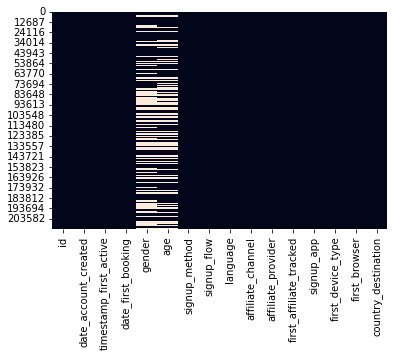

In [781]:
sns.heatmap(result.isnull(), cbar=False)

# gender: 

In [782]:
result['gender'] = result['gender'].bfill()
result['gender'] = result['gender'].ffill()

<AxesSubplot:>

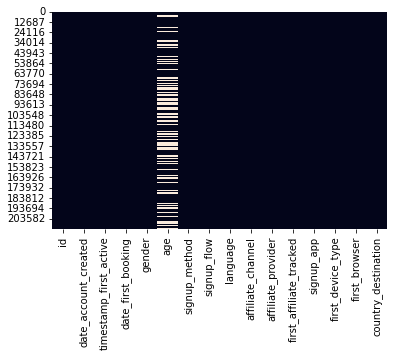

In [783]:
sns.heatmap(result.isnull(), cbar=False)

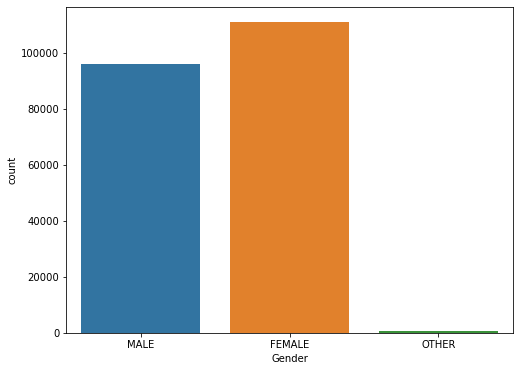

In [784]:
plt.figure( figsize=(8, 6))
sns.countplot(x = result['gender'])
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

In [785]:
result.drop(result[result['gender'] == 'OTHER'].index, inplace = True) # drop other values

In [786]:
result.shape

(206892, 16)

# Age:

In [787]:
result.age.describe()

count    123157.000000
mean         49.286001
std         153.362970
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

####  here, we have max age:2014  and min: 1 and this not true

In [788]:
# we will make the min: 18 and max: 95
# fill null values with mean
result['age'].fillna(result['age'].mean(),inplace =True)
Q1 = result['age'].quantile(0.18)
Q3 = result['age'].quantile(0.95)
IQR = Q3-Q1
l = Q1 - 1.5*IQR
u = Q3 + 1.5*IQR
a = result['age']< l
b = result['age']> u
result = result [~(a|b)]


In [789]:
result.age.describe()

count    204624.000000
mean         41.751238
std          10.978938
min           1.000000
25%          32.000000
50%          48.000000
75%          49.286001
max         101.000000
Name: age, dtype: float64

In [790]:
result['age']. isnull().sum()

0

<AxesSubplot:>

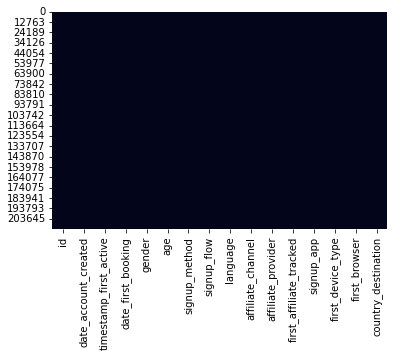

In [791]:
sns.heatmap(result.isnull(), cbar=False)

#### now we can change the type of "age" column from float to int

In [792]:
 # convert it to 'int' type
result['age']=result['age'].astype('int32')

In [793]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204624 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       204624 non-null  object        
 1   date_account_created     204624 non-null  datetime64[ns]
 2   timestamp_first_active   204624 non-null  datetime64[ns]
 3   date_first_booking       204624 non-null  datetime64[ns]
 4   gender                   204624 non-null  object        
 5   age                      204624 non-null  int32         
 6   signup_method            204624 non-null  object        
 7   signup_flow              204624 non-null  int64         
 8   language                 204624 non-null  object        
 9   affiliate_channel        204624 non-null  object        
 10  affiliate_provider       204624 non-null  object        
 11  first_affiliate_tracked  204624 non-null  object        
 12  signup_app      

##  Splitting date into Day-Month-Year

In [794]:
# date first booking
result['fb_year'] = result.date_first_booking.dt.year
result['fb_month'] = result.date_first_booking.dt.month
result['fb_day'] = result.date_first_booking.dt.day

# time first active
result['act_year'] = result.timestamp_first_active.dt.year
result['act_month'] = result.timestamp_first_active.dt.month
result['act_day'] = result.timestamp_first_active.dt.day


## dropping unnecessary columns:

In [795]:
result.drop(['date_account_created','timestamp_first_active','date_first_booking','signup_flow'],axis=1,inplace=True) 

In [796]:
result.head()

,id,gender,age,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,fb_year,fb_month,fb_day,act_year,act_month,act_day
0,gxn3p5htnn,MALE,49,facebook,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2010,8,2,1970,1,1
1,820tgsjxq7,MALE,38,facebook,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2010,8,2,1970,1,1
2,4ft3gnwmtx,FEMALE,56,basic,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2010,8,2,1970,1,1
3,bjjt8pjhuk,FEMALE,42,facebook,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2012,9,8,1970,1,1
4,87mebub9p4,FEMALE,41,basic,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2010,2,18,1970,1,1


In [797]:
result.shape

(204624, 18)

## convert our columns to be numeric

In [798]:
# First browser column
label_encoder = preprocessing.LabelEncoder()
  
result["first_browser"]= label_encoder.fit_transform(result["first_browser"])
  
result["first_browser"].unique()

array([ 7, 20, 16, 40, 28,  8, 39,  9,  1,  0, 38, 32, 47, 27, 21,  2, 42,
        6,  3,  5, 24, 45, 23, 33, 43, 26, 25, 41, 13, 12, 50, 18, 14, 29,
       31, 36, 30, 10, 11, 17, 37,  4, 34, 49, 48, 44, 15, 46, 19, 35, 22])

In [799]:
# id column
label_encoder = preprocessing.LabelEncoder()

result["id"]= label_encoder.fit_transform(result["id"])
  
result["id"].unique()

array([ 96409,  46068,  25356, ...,  38128, 110926, 136028])

In [800]:
# gender column
label_encoder = preprocessing.LabelEncoder()

result["gender"]= label_encoder.fit_transform(result["gender"])
  
result["gender"].unique()

array([1, 0])

In [801]:
# signup method column
label_encoder = preprocessing.LabelEncoder()

result["signup_method"]= label_encoder.fit_transform(result["signup_method"])
  
result["signup_method"].unique()

array([1, 0, 2])

In [802]:
# language column
label_encoder = preprocessing.LabelEncoder()

result["language"]= label_encoder.fit_transform(result["language"])
  
result["language"].unique()

array([ 5,  8,  3,  6, 24, 15, 14, 13, 20, 18,  4, 21, 19, 16, 10,  2, 11,
        7, 17, 23, 22,  1,  9,  0, 12])

In [803]:
# affiliate channel column
label_encoder = preprocessing.LabelEncoder()

result["affiliate_channel"]= label_encoder.fit_transform(result["affiliate_channel"])
  
result["affiliate_channel"].unique()

array([2, 7, 3, 6, 1, 5, 4, 0])

In [804]:
# signup app column
label_encoder = preprocessing.LabelEncoder()

result["signup_app"]= label_encoder.fit_transform(result["signup_app"])
  
result["signup_app"].unique()

array([2, 3, 1, 0])

In [805]:
# first device type column
label_encoder = preprocessing.LabelEncoder()

result["first_device_type"]= label_encoder.fit_transform(result["first_device_type"])
  
result["first_device_type"].unique()

array([3, 6, 8, 4, 2, 1, 7, 0, 5])

In [806]:
# first_affiliate_tracked column
label_encoder = preprocessing.LabelEncoder()

result["first_affiliate_tracked"]= label_encoder.fit_transform(result["first_affiliate_tracked"])
  
result["first_affiliate_tracked"].unique()

array([6, 3, 0, 5, 4, 2, 1])

In [807]:
# affiliate provider column
label_encoder = preprocessing.LabelEncoder()

result["affiliate_provider"]= label_encoder.fit_transform(result["affiliate_provider"])
  
result["affiliate_provider"].unique()

array([ 4,  8, 12,  2,  6, 14,  1, 10,  7,  5, 16, 13,  9, 15, 11,  0, 17,
        3])

In [808]:
# # country destination column
# label_encoder = preprocessing.LabelEncoder()
  
# result["country_destination"]= label_encoder.fit_transform(result["country_destination"])
  
# result["country_destination"].unique()

In [809]:
result.head()

,id,gender,age,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,fb_year,fb_month,fb_day,act_year,act_month,act_day
0,96409,1,49,1,5,2,4,6,2,3,7,NDF,2010,8,2,1970,1,1
1,46068,1,38,1,5,7,8,6,2,3,7,NDF,2010,8,2,1970,1,1
2,25356,0,56,0,5,2,4,6,2,6,20,US,2010,8,2,1970,1,1
3,65744,0,42,1,5,2,4,6,2,3,16,other,2012,9,8,1970,1,1
4,46960,0,41,0,5,2,4,6,2,3,7,US,2010,2,18,1970,1,1


# Check for outliers:

<AxesSubplot:>

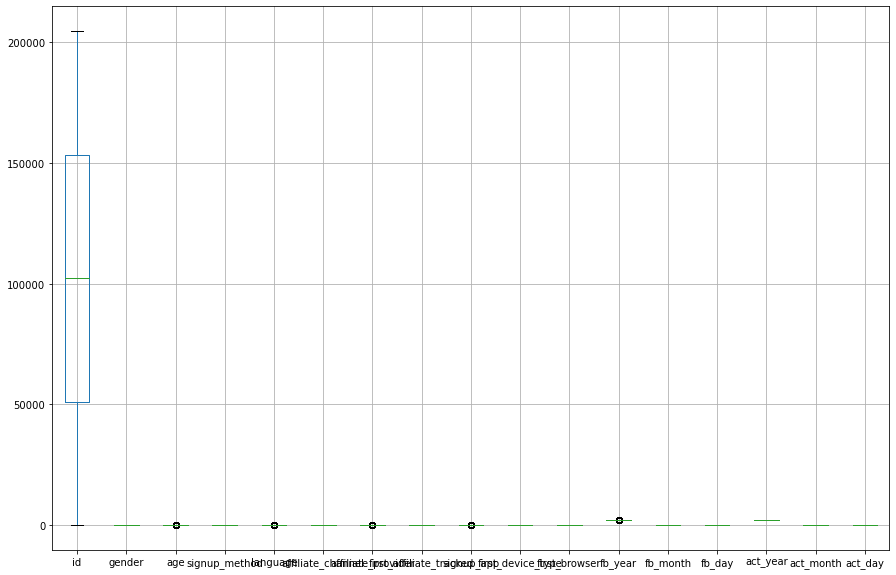

In [810]:
#using boxplot for noticing the noise value 
plt.figure(figsize=(15,10))

result.boxplot()

## using Z-score to detect and remove outliers:

## Age:

<AxesSubplot:xlabel='age'>

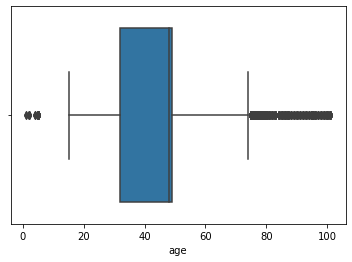

In [811]:
sns.boxplot(data=result, x=result["age"])

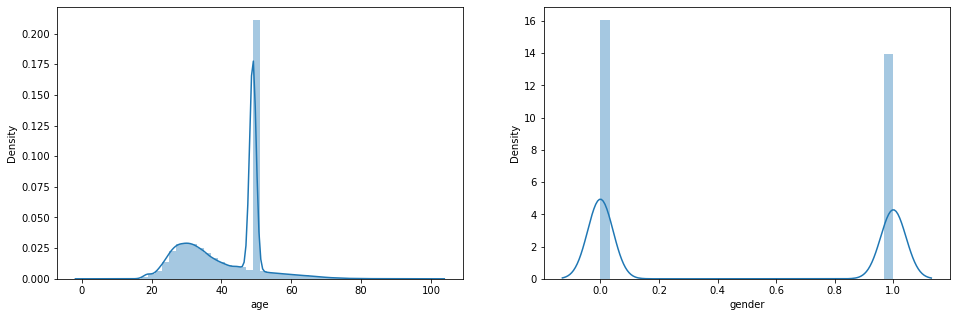

In [812]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(result["age"])

plt.subplot(1,2,2)
sns.distplot(result["gender"])

plt.show()

In [813]:
result["gender"].skew()

0.14292854804240956

In [814]:
result["age"].describe()

count    204624.000000
mean         41.634202
std          10.899228
min           1.000000
25%          32.000000
50%          48.000000
75%          49.000000
max         101.000000
Name: age, dtype: float64

In [815]:
upper = result['age'].mean() + 3*result['age'].std()
lower = result['age'].mean() - 3*result['age'].std()
print(upper)
print(lower) 

74.33188600432483
8.93651848390725


In [816]:
# Finding the outliers
result[(result['age'] >upper) | (result['age'] < lower)]

,id,gender,age,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,fb_year,fb_month,fb_day,act_year,act_month,act_day
482,159370,0,5,1,5,3,2,5,2,3,40,IT,2010,4,29,1970,1,1
645,107862,1,95,0,5,2,4,6,2,3,16,NDF,2010,5,21,1970,1,1
660,30036,0,5,1,5,2,4,6,2,3,40,NDF,2010,5,24,1970,1,1
776,169908,1,5,1,5,3,2,6,2,3,40,NDF,2011,6,7,1970,1,1
777,118127,0,94,0,5,1,8,0,2,3,40,NDF,2011,6,7,1970,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212372,109450,1,82,0,5,2,4,6,2,6,20,NDF,2014,7,2,1970,1,1
212419,143284,0,89,0,5,5,8,3,2,6,16,US,2014,11,10,1970,1,1
212441,117253,0,75,0,5,5,8,6,2,3,16,US,2014,6,30,1970,1,1
212862,58820,0,81,0,5,5,8,6,2,7,28,NDF,2014,12,21,1970,1,1


## Trimming:

In [817]:
# Trimming

new_data = result[(result['age'] <upper) & (result['age'] > lower)]
new_data

,id,gender,age,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,fb_year,fb_month,fb_day,act_year,act_month,act_day
0,96409,1,49,1,5,2,4,6,2,3,7,NDF,2010,8,2,1970,1,1
1,46068,1,38,1,5,7,8,6,2,3,7,NDF,2010,8,2,1970,1,1
2,25356,0,56,0,5,2,4,6,2,6,20,US,2010,8,2,1970,1,1
3,65744,0,42,1,5,2,4,6,2,3,16,other,2012,9,8,1970,1,1
4,46960,0,41,0,5,2,4,6,2,3,7,US,2010,2,18,1970,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,204278,1,32,0,5,5,8,3,2,3,40,NDF,2014,7,2,1970,1,1
213447,128008,1,49,0,5,2,4,0,2,6,7,NDF,2014,7,2,1970,1,1
213448,38128,1,32,0,5,2,4,6,2,3,16,NDF,2014,7,2,1970,1,1
213449,110926,1,49,0,5,3,12,5,3,8,28,NDF,2014,7,2,1970,1,1


In [818]:
mean = np.mean(result['age'])
std = np.std(result['age'])
result['age_zscore'] = (result['age'] - mean)/std

In [819]:
result.head()

,id,gender,age,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,fb_year,fb_month,fb_day,act_year,act_month,act_day,age_zscore
0,96409,1,49,1,5,2,4,6,2,3,7,NDF,2010,8,2,1970,1,1,0.675811
1,46068,1,38,1,5,7,8,6,2,3,7,NDF,2010,8,2,1970,1,1,-0.333437
2,25356,0,56,0,5,2,4,6,2,6,20,US,2010,8,2,1970,1,1,1.318060
3,65744,0,42,1,5,2,4,6,2,3,16,other,2012,9,8,1970,1,1,0.033562
4,46960,0,41,0,5,2,4,6,2,3,7,US,2010,2,18,1970,1,1,-0.058188


In [820]:
result[result['age_zscore'] > std]

,id,gender,age,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,fb_year,fb_month,fb_day,act_year,act_month,act_day,age_zscore


In [821]:
result[result['age_zscore'] <-std]

,id,gender,age,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,fb_year,fb_month,fb_day,act_year,act_month,act_day,age_zscore


In [822]:
result[(result['age_zscore'] > std) | (result['age_zscore'] < -std)]

,id,gender,age,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,fb_year,fb_month,fb_day,act_year,act_month,act_day,age_zscore


In [823]:
# Trimming 
new_data = result[(result['age_zscore'] < std) & (result['age_zscore'] > -std)]
new_data

,id,gender,age,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,fb_year,fb_month,fb_day,act_year,act_month,act_day,age_zscore
0,96409,1,49,1,5,2,4,6,2,3,7,NDF,2010,8,2,1970,1,1,0.675811
1,46068,1,38,1,5,7,8,6,2,3,7,NDF,2010,8,2,1970,1,1,-0.333437
2,25356,0,56,0,5,2,4,6,2,6,20,US,2010,8,2,1970,1,1,1.318060
3,65744,0,42,1,5,2,4,6,2,3,16,other,2012,9,8,1970,1,1,0.033562
4,46960,0,41,0,5,2,4,6,2,3,7,US,2010,2,18,1970,1,1,-0.058188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,204278,1,32,0,5,5,8,3,2,3,40,NDF,2014,7,2,1970,1,1,-0.883937
213447,128008,1,49,0,5,2,4,0,2,6,7,NDF,2014,7,2,1970,1,1,0.675811
213448,38128,1,32,0,5,2,4,6,2,3,16,NDF,2014,7,2,1970,1,1,-0.883937
213449,110926,1,49,0,5,3,12,5,3,8,28,NDF,2014,7,2,1970,1,1,0.675811


## Capping:

In [824]:
result["age"] = np.where(
    result["age"]>upper,
    upper,
    np.where(
        result["age"]<lower,
        lower,
        result["age"]
    )
)

<AxesSubplot:xlabel='age'>

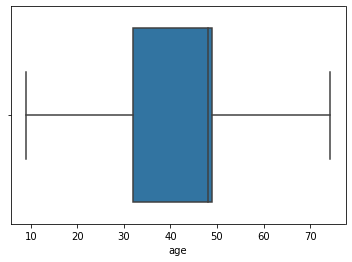

In [825]:
sns.boxplot(data=result, x=result["age"])

### Now, "age" column free from outliers!

# correlation analysis:

In [826]:
correlation = result.corr()
correlation*100

,id,gender,age,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,fb_year,fb_month,fb_day,act_year,act_month,act_day,age_zscore
id,100.000000,-0.186958,-0.226663,0.219498,-0.023283,0.608240,0.357710,-0.406934,0.018013,0.185726,0.156903,0.313457,-0.389355,0.012440,NaN,NaN,NaN,-0.213304
gender,-0.186958,100.000000,0.734228,2.443539,0.116451,-3.020760,-0.291245,2.670676,0.819594,0.554477,-4.388749,0.788306,1.192747,0.131292,NaN,NaN,NaN,0.711576
age,-0.226663,0.734228,100.000000,-30.497125,-3.732024,7.507328,1.182934,-2.613047,-3.672950,6.061635,7.209988,-0.830999,0.400817,-0.064161,NaN,NaN,NaN,99.720790
signup_method,0.219498,2.443539,-30.497125,100.000000,3.512719,-7.141778,8.716556,-0.061856,-2.319218,-5.291484,-3.008805,-6.512130,0.380533,0.082664,NaN,NaN,NaN,-29.793466
language,-0.023283,0.116451,-3.732024,3.512719,100.000000,-0.544134,1.860646,-0.644385,-0.267734,2.899464,-2.339197,2.708525,0.429369,0.073673,NaN,NaN,NaN,-3.685815
affiliate_channel,0.608240,-3.020760,7.507328,-7.141778,-0.544134,100.000000,38.865772,-26.706045,1.239423,-4.752765,-2.032967,-1.301107,-1.316237,-0.268495,NaN,NaN,NaN,7.450437
affiliate_provider,0.357710,-0.291245,1.182934,8.716556,1.860646,38.865772,100.000000,-11.793375,-7.502849,1.074301,-0.356312,2.048108,-0.410651,-0.079895,NaN,NaN,NaN,1.218628
first_affiliate_tracked,-0.406934,2.670676,-2.613047,-0.061856,-0.644385,-26.706045,-11.793375,100.000000,2.645999,9.306158,-2.375922,2.797927,-0.882088,-0.738795,NaN,NaN,NaN,-2.632369
signup_app,0.018013,0.819594,-3.672950,-2.319218,-0.267734,1.239423,-7.502849,2.645999,100.000000,32.173620,1.008128,1.697949,-0.532894,-0.108903,NaN,NaN,NaN,-3.606560
first_device_type,0.185726,0.554477,6.061635,-5.291484,2.899464,-4.752765,1.074301,9.306158,32.173620,100.000000,-17.754056,7.087878,-0.694005,0.190804,NaN,NaN,NaN,5.956197


In [827]:
corr_matrix=correlation

In [828]:
corr_matrix["age"].sort_values(ascending=False)

age                        1.000000
age_zscore                 0.997208
affiliate_channel          0.075073
first_browser              0.072100
first_device_type          0.060616
affiliate_provider         0.011829
gender                     0.007342
fb_month                   0.004008
fb_day                    -0.000642
id                        -0.002267
fb_year                   -0.008310
first_affiliate_tracked   -0.026130
signup_app                -0.036730
language                  -0.037320
signup_method             -0.304971
act_year                        NaN
act_month                       NaN
act_day                         NaN
Name: age, dtype: float64

In [829]:
#getting upper trianguler correlation matrix
upper_matrix =corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

In [830]:
upper_matrix

,id,gender,age,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,fb_year,fb_month,fb_day,act_year,act_month,act_day,age_zscore
id,NaN,-0.00187,-0.002267,0.002195,-0.000233,0.006082,0.003577,-0.004069,0.000180,0.001857,0.001569,0.003135,-0.003894,0.000124,NaN,NaN,NaN,-0.002133
gender,NaN,NaN,0.007342,0.024435,0.001165,-0.030208,-0.002912,0.026707,0.008196,0.005545,-0.043887,0.007883,0.011927,0.001313,NaN,NaN,NaN,0.007116
age,NaN,NaN,NaN,-0.304971,-0.037320,0.075073,0.011829,-0.026130,-0.036730,0.060616,0.072100,-0.008310,0.004008,-0.000642,NaN,NaN,NaN,0.997208
signup_method,NaN,NaN,NaN,NaN,0.035127,-0.071418,0.087166,-0.000619,-0.023192,-0.052915,-0.030088,-0.065121,0.003805,0.000827,NaN,NaN,NaN,-0.297935
language,NaN,NaN,NaN,NaN,NaN,-0.005441,0.018606,-0.006444,-0.002677,0.028995,-0.023392,0.027085,0.004294,0.000737,NaN,NaN,NaN,-0.036858
affiliate_channel,NaN,NaN,NaN,NaN,NaN,NaN,0.388658,-0.267060,0.012394,-0.047528,-0.020330,-0.013011,-0.013162,-0.002685,NaN,NaN,NaN,0.074504
affiliate_provider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.117934,-0.075028,0.010743,-0.003563,0.020481,-0.004107,-0.000799,NaN,NaN,NaN,0.012186
first_affiliate_tracked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.026460,0.093062,-0.023759,0.027979,-0.008821,-0.007388,NaN,NaN,NaN,-0.026324
signup_app,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.321736,0.010081,0.016979,-0.005329,-0.001089,NaN,NaN,NaN,-0.036066
first_device_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.177541,0.070879,-0.006940,0.001908,NaN,NaN,NaN,0.059562


Text(0.5, 1.0, 'Correlation Matrix')

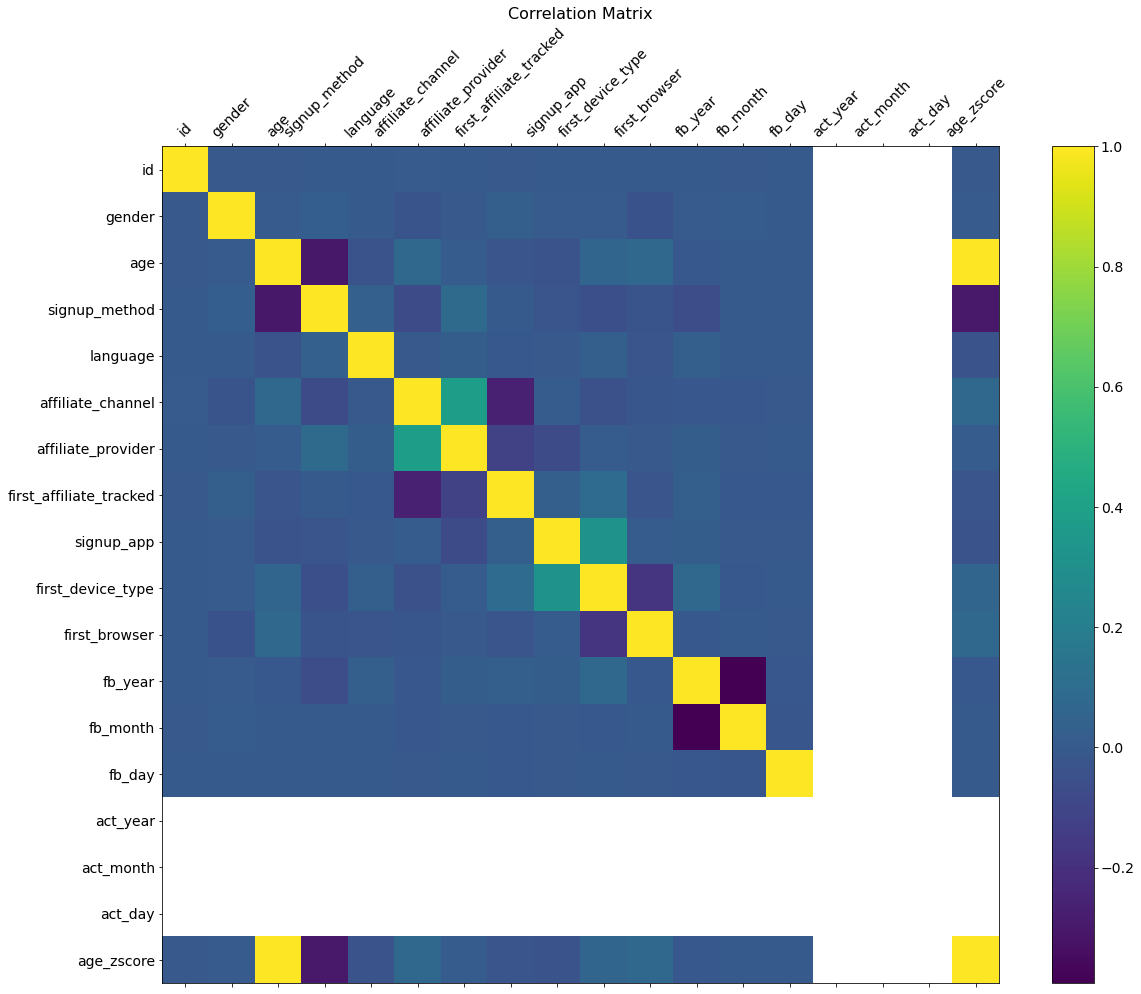

In [831]:
#correlation graph (notice the difference in colours)
f = plt.figure(figsize=(19, 15))
plt.matshow(correlation, fignum=f.number)
plt.xticks(range(result.select_dtypes(['number']).shape[1]), result.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(result.select_dtypes(['number']).shape[1]), result.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)


In [832]:
#here we will get columns that must be dropped (higher than 0.8 or lower than -0.8) 
to_drop=[column for column in upper_matrix.columns if  any(upper_matrix[column]>0.5) or any(upper_matrix[column]<-0.5)]
to_drop

['age_zscore']

In [833]:
#drop columns with high correlation 
#axis=1 (dropped by columns not by rows)(same number of rows BUT different number of columns)
#inplace=True(the data is modified in place, which means it will return nothing and the dataframe is now updated)
result.drop(['age_zscore'],axis=1,inplace=True)

## Third Stage: Prediction:

In [834]:
result.head()

,id,gender,age,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,fb_year,fb_month,fb_day,act_year,act_month,act_day
0,96409,1,49.0,1,5,2,4,6,2,3,7,NDF,2010,8,2,1970,1,1
1,46068,1,38.0,1,5,7,8,6,2,3,7,NDF,2010,8,2,1970,1,1
2,25356,0,56.0,0,5,2,4,6,2,6,20,US,2010,8,2,1970,1,1
3,65744,0,42.0,1,5,2,4,6,2,3,16,other,2012,9,8,1970,1,1
4,46960,0,41.0,0,5,2,4,6,2,3,7,US,2010,2,18,1970,1,1


In [835]:
# separating the data and labels
X = result.drop(columns = ['fb_year','act_year','country_destination','id'], axis=1) #store all features except label 
Y = result['country_destination'] #store label data 

In [836]:
Y

0           NDF
1           NDF
2            US
3         other
4            US
          ...  
213446      NDF
213447      NDF
213448      NDF
213449      NDF
213450      NDF
Name: country_destination, Length: 204624, dtype: object

In [837]:
from sklearn.preprocessing import StandardScaler


In [838]:
#creating an object scaler to use standardScaler
scaler = StandardScaler()


In [839]:
scaler.fit(X)

StandardScaler()

In [840]:
#fitting the fitted data and transformed train and test data form standard scaler
scaled_features = scaler.transform(X)

In [841]:
standraized_data = pd.DataFrame(scaled_features,columns=result.columns[:-4])
standraized_data.head()

,id,gender,age,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,fb_year,fb_month
0,1.074014,0.689167,1.549314,-0.140395,-0.510199,-0.591772,0.831277,-0.013808,-0.929815,-1.026260,0.588384,-1.565066,0.0,0.0
1,1.074014,-0.334607,1.549314,-0.140395,2.385575,0.961300,0.831277,-0.013808,-0.929815,-1.026260,0.588384,-1.565066,0.0,0.0
2,-0.931087,1.340659,-0.629130,-0.140395,-0.510199,-0.591772,0.831277,-0.013808,0.623619,-0.026260,0.588384,-1.565066,0.0,0.0
3,-0.931087,0.037674,1.549314,-0.140395,-0.510199,-0.591772,0.831277,-0.013808,-0.929815,-0.333952,0.901712,-0.877531,0.0,0.0
4,-0.931087,-0.055396,-0.629130,-0.140395,-0.510199,-0.591772,0.831277,-0.013808,-0.929815,-1.026260,-1.291583,0.268360,0.0,0.0


## Train Test Split:


In [842]:
from sklearn.model_selection import train_test_split


In [843]:
#by default train test split splits data into 75% training data and 25 test data
X_train, X_test, y_train, y_test = train_test_split(scaled_features,Y,test_size=0.25,random_state=42)
                                                    


In [844]:
len(X_train) 

153468

In [845]:
len(X_test)

51156

In [846]:
#split the data into train and test set
#train,test = train_test_split(result, test_size=0.25, random_state=0)

# KNN:

In [847]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [848]:
# from sklearn.preprocessing import StandardScaler
# caler = StandardScaler()
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [849]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=75)
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=75)

In [850]:
y_pred = classifier.predict(X_test_scaled)
pd.DataFrame(y_pred)

,0
0,US
1,NDF
2,NDF
3,NDF
4,NDF
...,...
51151,NDF
51152,NDF
51153,NDF
51154,NDF


In [851]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 61.27140511376965


# KNN:
#### with feature selection.

In [852]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit,cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score 
from featurewiz import featurewiz
np.random.seed(1234)

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
    Shape of your Data Set loaded: (204624, 18)
    Loaded train data. Shape = (204624, 18)
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Multi_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
######

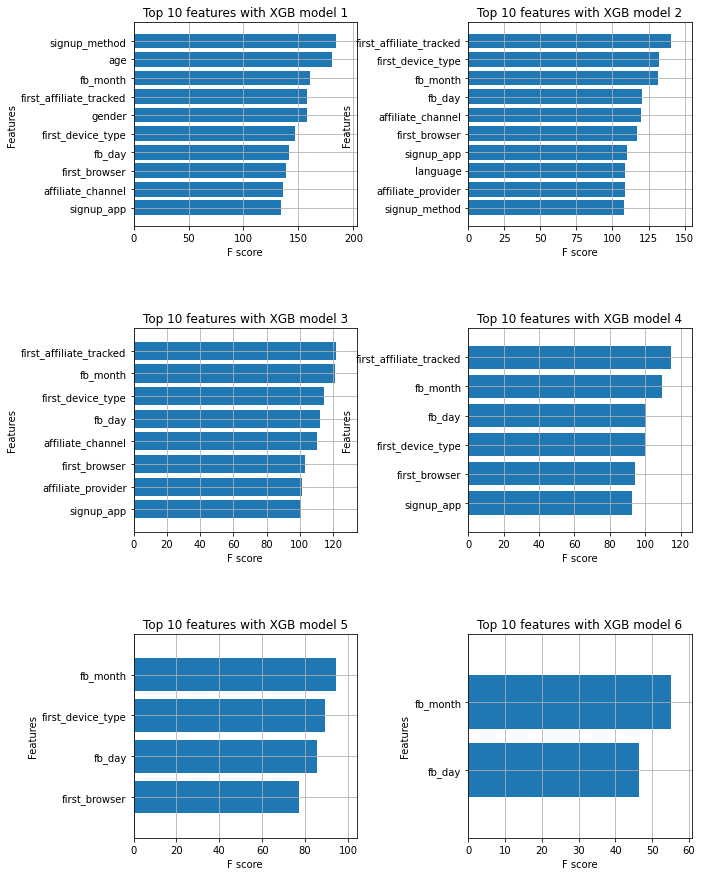

    Completed XGBoost feature selection in 8 seconds
    Alert: No ID variables ['id'] are included in selected features
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 12 important features:
['signup_method', 'age', 'fb_month', 'first_affiliate_tracked', 'gender', 'first_device_type', 'fb_day', 'first_browser', 'affiliate_channel', 'signup_app', 'language', 'affiliate_provider']
Total Time taken for featurewiz selection = 48 seconds
Output contains a list of 12 important features and a train dataframe


In [853]:
# automatic feature selection by using featurewiz package
target = 'country_destination'
 
features, train = featurewiz(result, target, corr_limit=0.8, verbose=2, sep=",",header=0,test_data="", feature_engg="", category_encoders="")

In [854]:
print(features)

['signup_method', 'age', 'fb_month', 'first_affiliate_tracked', 'gender', 'first_device_type', 'fb_day', 'first_browser', 'affiliate_channel', 'signup_app', 'language', 'affiliate_provider']


In [855]:
X_new = train.drop(['country_destination'],axis=1)
 
Y = train['country_destination']

In [856]:
# preprocessing the features 
X_scaled = StandardScaler().fit_transform(X_new)

In [857]:
#split data into train and validate 
x_train, x_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size = 0.2,stratify=Y, random_state=1)

In [858]:
# create and train classifier 
classifier = RandomForestClassifier()
 
classifier.fit(x_train,Y_train)

RandomForestClassifier()

In [859]:
#make prediction 
preds = classifier.predict(x_test) 
#check performance
accuracy_score(preds,Y_test) 

0.5731215638362859

# Desicion Tree:

In [860]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [861]:
dtree = DecisionTreeClassifier(random_state=0,max_depth=3,min_samples_leaf=5)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=0)

In [862]:
dtree.get_params() # parameters for the estimator

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [863]:
#get the tree depth
dtree.get_depth()


3

In [864]:
# get the number of leaves in one side 
dtree.get_n_leaves()

8

In [865]:
#summarize feature importance (who is the most important ?)
importance=dtree.feature_importances_
for i ,v in enumerate (importance):
    print('Feature: %0d ,score:%.5f'%(i,v))

Feature: 0 ,score:0.00000
Feature: 1 ,score:0.69826
Feature: 2 ,score:0.27759
Feature: 3 ,score:0.00806
Feature: 4 ,score:0.00000
Feature: 5 ,score:0.00000
Feature: 6 ,score:0.00000
Feature: 7 ,score:0.00000
Feature: 8 ,score:0.01609
Feature: 9 ,score:0.00000
Feature: 10 ,score:0.00000
Feature: 11 ,score:0.00000
Feature: 12 ,score:0.00000
Feature: 13 ,score:0.00000


In [866]:
predictions = dtree.predict(X_test)

In [867]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score
accuracy_score(y_test,predictions)*100

62.7570568457268